In [1]:
import os
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import Sequence

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from RoadDataset import RoadDataset
from MultiRoadDataset import MultiRoadDataset

In [2]:
train_datasets_path = "../notebooks/datasets/train/"
sub_dirs = os.listdir(train_datasets_path)
train_dataset_paths = [[train_datasets_path + sub_dir + "/" + sub_dir + ".csv", train_datasets_path + sub_dir + "/frames/"] for sub_dir in sub_dirs]
train_dataset_paths

[['../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/frames/'],
 ['../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv',
  '../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/frames/'],
 ['../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv',
  '../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/frames/'],
 ['../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv',
  '../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 

In [3]:
column_names = ['filename','steering_wheel_angle','speed', 'blink_l', 'blink_r']
my_batch_size = 16
multi_train_dataset = MultiRoadDataset(column_names, batch_size=my_batch_size)

for train_dataset_path in train_dataset_paths:
    multi_train_dataset.addRoadDataset(train_dataset_path[0], train_dataset_path[1])
    

Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv
Loaded dataset with 8096 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv
Loaded dataset with 3775 samples
Reading csv file: ../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv
Failed to read csv file!
Loaded dataset with 0 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv
Loaded dataset with 7060 samples
Reading csv file: ../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv
Loaded dataset with 3112 samples
Reading csv file: ../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv
Loaded dataset with 17985 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 2020.csv
Loaded dataset with 2793 samples
Reading csv file: ../notebooks/datasets/train/

# SWA vs speed:

In [4]:
multi_train_dataset.clean()

Cleaning dataset. Starting with 8096 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 389 rows for reason: High SWA (> +180/ < -180 deg)
Removing 1666 rows for reason: Low speed (< 25 km/h)
Removing 141 rows for reason: Left blinker on
Removing 42 rows for reason: Right blinker on
5855 samples remaining.
Cleaning dataset. Starting with 3775 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 425 rows for reason: High SWA (> +180/ < -180 deg)
Removing 862 rows for reason: Low speed (< 25 km/h)
Removing 90 rows for reason: Left blinker on
Removing 221 rows for reason: Right blinker on
2174 samples remaining.
Cleaning dataset. Starting with 0 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 0 rows for reason: High SWA (> +180/ < -180 deg)
Removing 0 rows for reason: L

/tf/notebooks/Autopilot/diypilot/notebooks/RoadDataset.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['filename'] = csv['filename'].shift(self.latency_compensation_frames, fill_value = "No frame")
/tf/notebooks/Autopilot/diypilot/notebooks/RoadDataset.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['filename'] = csv['filename'].shift(self.latency_compensation_frames, fill_value = "No frame")



Removing 174 rows for reason: High SWA (> +180/ < -180 deg)
Removing 630 rows for reason: Low speed (< 25 km/h)
Removing 47 rows for reason: Left blinker on
Removing 178 rows for reason: Right blinker on
5599 samples remaining.
Cleaning dataset. Starting with 15077 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 535 rows for reason: High SWA (> +180/ < -180 deg)
Removing 1620 rows for reason: Low speed (< 25 km/h)
Removing 170 rows for reason: Left blinker on
Removing 172 rows for reason: Right blinker on
12577 samples remaining.
Cleaning dataset. Starting with 0 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 0 rows for reason: High SWA (> +180/ < -180 deg)
Removing 0 rows for reason: Low speed (< 25 km/h)
Removing 0 rows for reason: Left blinker on
Removing 0 rows for reason: Right blinker on
0 samples remaining.
Cleaning dataset. 

/tf/notebooks/Autopilot/diypilot/notebooks/RoadDataset.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['filename'] = csv['filename'].shift(self.latency_compensation_frames, fill_value = "No frame")


Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 689 rows for reason: High SWA (> +180/ < -180 deg)
Removing 2918 rows for reason: Low speed (< 25 km/h)
Removing 302 rows for reason: Left blinker on
Removing 552 rows for reason: Right blinker on
33775 samples remaining.
Cleaning dataset. Starting with 8994 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 522 rows for reason: High SWA (> +180/ < -180 deg)
Removing 6777 rows for reason: Low speed (< 25 km/h)
Removing 82 rows for reason: Left blinker on
Removing 42 rows for reason: Right blinker on
1568 samples remaining.
Cleaning dataset. Starting with 0 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 0 rows for reason: High SWA (> +180/ < -180 deg)
Removing 0 rows for reason: Low speed (< 25 km/h)
Removing 0 rows for rea

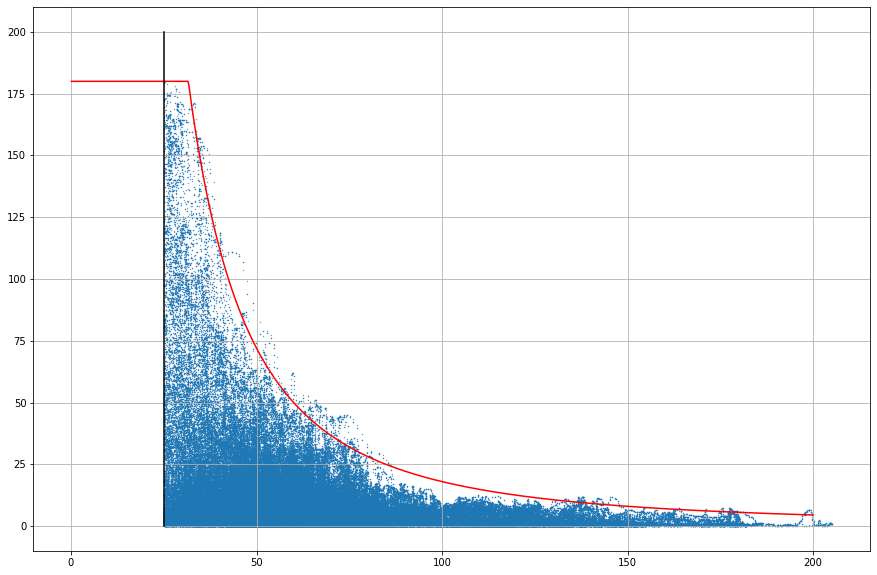

In [5]:
swas = multi_train_dataset.get_csv()['steering_wheel_angle']
speeds = multi_train_dataset.get_csv()['speed']

#remove -999 dummy speed value
no_speeds_indices = speeds[speeds < 0].index
speeds = speeds.drop(no_speeds_indices)
swas = swas.drop(no_speeds_indices)
swas = abs(swas)


from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.grid(True)
plt.scatter(x=speeds, y=swas, s=.1)

vel = np.linspace(0.1, 200, 1000)
envelope = 180000/(vel**2)
envelope = np.clip(envelope, 0, 180)

plt.plot(vel, envelope, color='red')

plt.plot([25,25], [0,200], color='black')

#plt.ylim(0, 50)
plt.show()

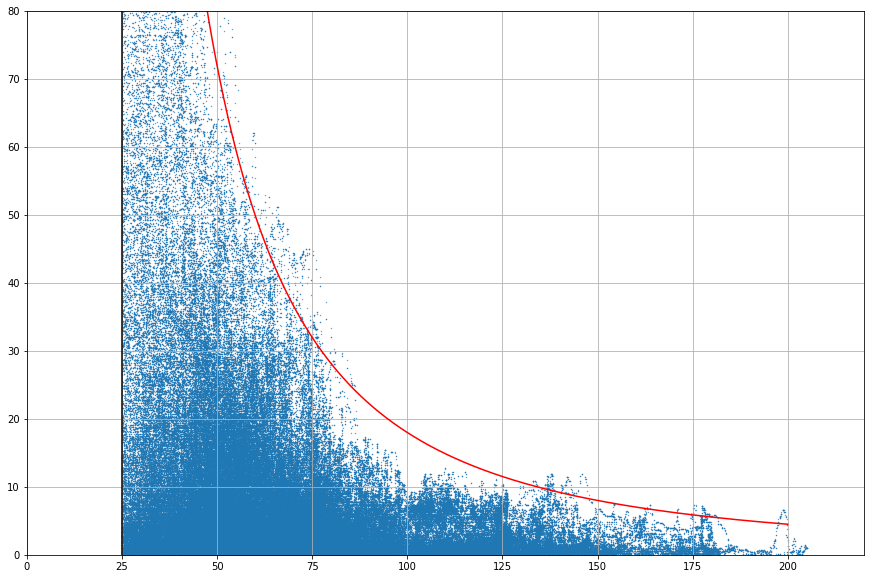

In [6]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.scatter(x=speeds, y=swas, s=.1)

plt.plot(vel, envelope, color='red')
plt.plot([25,25], [0,500], color='black')
plt.xlim(0, 220)
plt.ylim(0, 80)
plt.show()

# Steering wheel speed vs vehicle speed

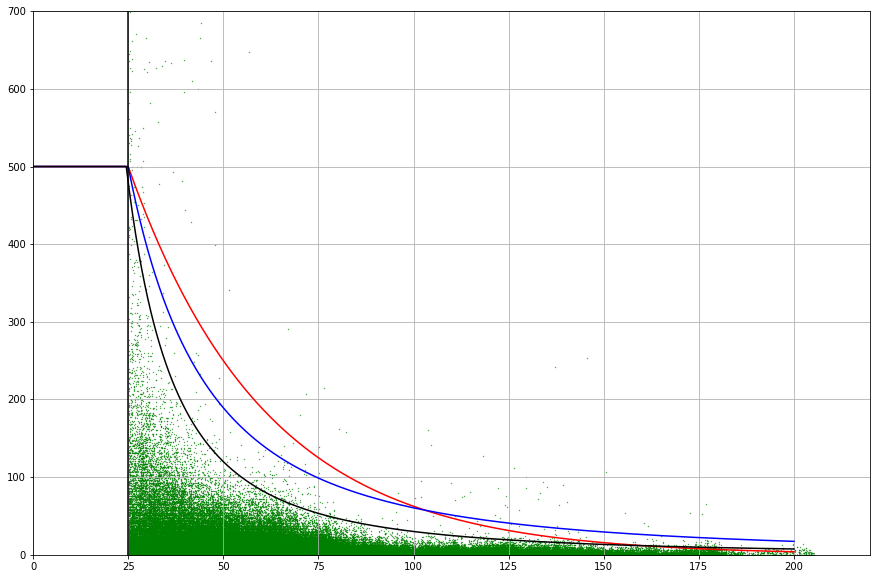

In [7]:
swas = multi_train_dataset.get_csv()['steering_wheel_angle']
steering_wheel_speed = swas.diff()
framerate = 15
steering_wheel_speed *= framerate
speeds = multi_train_dataset.get_csv()['speed']

swas

#remove -999 dummy speed value
no_speeds_indices = speeds[speeds < 0].index
#speeds = speeds.drop(no_speeds_indices)
#steering_wheel_speed = steering_wheel_speed.drop(no_speeds_indices)


steering_wheel_speed = abs(steering_wheel_speed)


plt.figure(figsize=(15,10))
plt.grid(True)

plt.scatter(x=speeds, y=steering_wheel_speed, s=.1, color='green')

vel = np.linspace(0.1, 200, 1000)
envelope = 1000/(2**(vel/25))
envelope2 = 800000/((vel+15)**2)
envelope3 = 300000/(vel**2)

envelope = np.clip(envelope, 0, 500)
envelope2 = np.clip(envelope2, 0, 500)
envelope3 = np.clip(envelope3, 0, 500)

plt.plot(vel, envelope, color='red')
plt.plot(vel, envelope2, color='blue')
plt.plot(vel, envelope3, color='black')

plt.plot([25,25], [0,700], color='black')

plt.xlim(0, 220)
plt.ylim(0, 700)
plt.show()

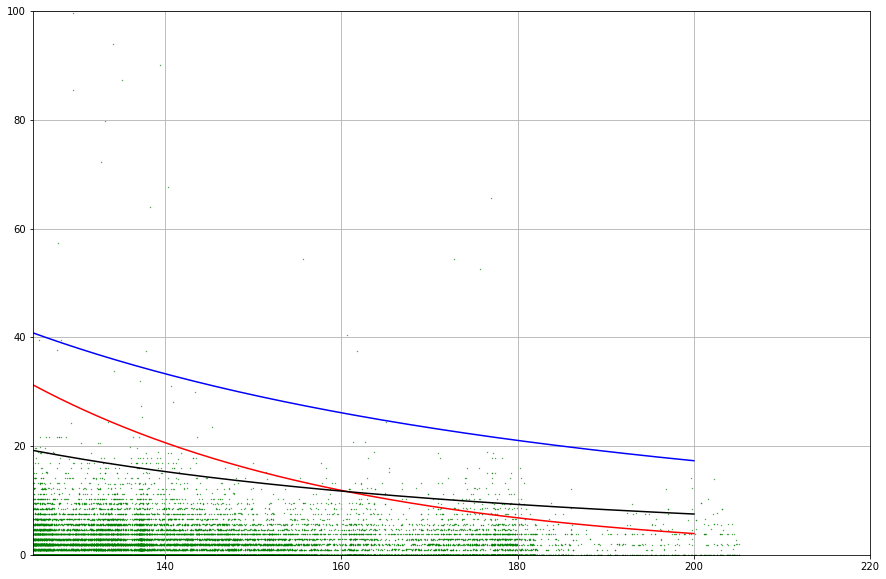

In [8]:
plt.figure(figsize=(15,10))
plt.grid(True)

plt.scatter(x=speeds, y=steering_wheel_speed, s=.1, color='green')

plt.plot(vel, envelope, color='red')
plt.plot(vel, envelope2, color='blue')
plt.plot(vel, envelope3, color='black')

plt.xlim(125, 220)
plt.ylim(0, 100)
plt.show()

In [9]:
multi_train_dataset.balance()

Balancing dataset (step 1). Starting with 5855 samples (Std. dev: 16.842018286135705)
1360 samples remaining after Balancing step 1 (Std. dev: 31.062119907221767)
Balancing dataset (step 2). Starting with 1360 samples
Mean: -0.7446764705882355)
1154 samples remaining after Balancing step 2
Mean: 0.21746967071057274)

Balancing dataset (step 1). Starting with 2174 samples (Std. dev: 24.36466022008058)
648 samples remaining after Balancing step 1 (Std. dev: 37.71635052151594)
Balancing dataset (step 2). Starting with 648 samples
Mean: -5.023780864197532)
530 samples remaining after Balancing step 2
Mean: -0.10496226415094317)

Balancing dataset (step 1). Starting with 5734 samples (Std. dev: 22.4455903600459)
1466 samples remaining after Balancing step 1 (Std. dev: 41.422771792169705)
Balancing dataset (step 2). Starting with 1466 samples
Mean: 0.6037175989085937)
1284 samples remaining after Balancing step 2
Mean: 0.0710514018691589)

Balancing dataset (step 1). Starting with 226 sample

6351 samples remaining after Balancing step 1 (Std. dev: 32.94361162712516)
Balancing dataset (step 2). Starting with 6351 samples
Mean: -0.8429255235396003)
5796 samples remaining after Balancing step 2
Mean: -0.05780883367839912)

Balancing dataset (step 1). Starting with 1568 samples (Std. dev: 23.594021327080537)
323 samples remaining after Balancing step 1 (Std. dev: 45.561599154346695)
Balancing dataset (step 2). Starting with 323 samples
Mean: 15.258823529411766)
250 samples remaining after Balancing step 2
Mean: 0.43707999999999947)

Balancing dataset (step 1). Starting with 19560 samples (Std. dev: 23.446296491322077)
4327 samples remaining after Balancing step 1 (Std. dev: 49.07664640463874)
Balancing dataset (step 2). Starting with 4327 samples
Mean: -1.284042061474463)
3600 samples remaining after Balancing step 2
Mean: 0.12394999999999982)

Balancing dataset (step 1). Starting with 3777 samples (Std. dev: 20.430532718685626)
926 samples remaining after Balancing step 1 (St

# SWA distribution:

In [10]:
# get a decent amount of samples
swas_non_augmented = []
swas_augmented = []
swas_augmented_normalized = []

sample_count = multi_train_dataset.get_batch_size()*len(multi_train_dataset)-1

for i in range(1000):
    
    sample_idx = random.randint(0, sample_count)
    
    sample = multi_train_dataset.get_sample(sample_idx, augment=False, crop=True, normalize=False)
    actual_swa = sample['swa']
    swas_non_augmented.append(actual_swa)
    
    sample = multi_train_dataset.get_sample(sample_idx, augment=True, crop=True, normalize=False)
    actual_swa = sample['swa']
    swas_augmented.append(actual_swa)
    
    sample = multi_train_dataset.get_sample(sample_idx, augment=True, crop=True, normalize=True)
    actual_swa = sample['swa']
    swas_augmented_normalized.append(actual_swa)

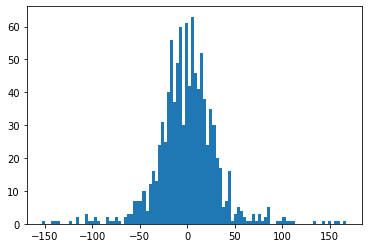

In [11]:
plt.hist(swas_non_augmented, bins=100)
plt.show()

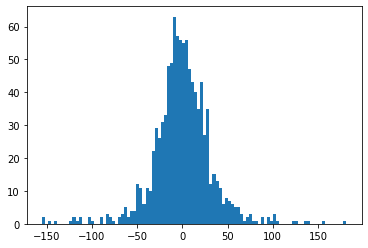

In [12]:
plt.hist(swas_augmented, bins=100)
plt.show()

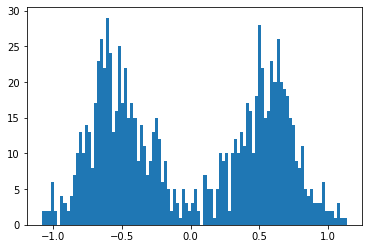

In [13]:
plt.hist(swas_augmented_normalized, bins=100)
plt.show()